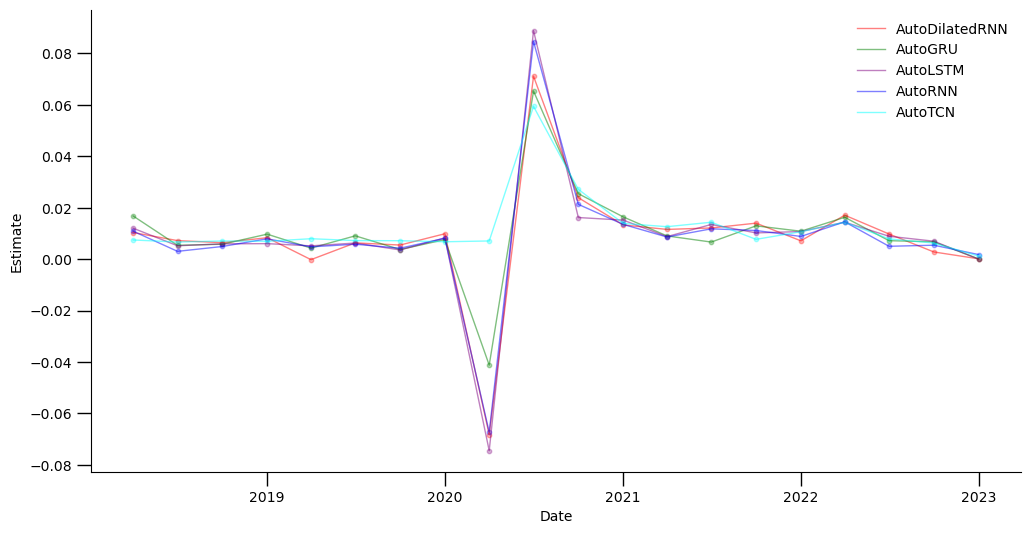

In [9]:
from matplotlib.ticker import MultipleLocator, AutoMinorLocator
from matplotlib.dates import YearLocator
import matplotlib.pyplot as plt
import pandas as pd

# Load your data
data = pd.read_csv('../presentation/01_data/tidy_results.csv')

# Convert 'ds' to datetime
data['ds'] = pd.to_datetime(data['ds'])

# Define the models to plot
models_to_plot = ['AutoDilatedRNN', 'AutoGRU', 'AutoRNN', 'AutoTCN', 'AutoLSTM']

# Filter data for selected models
filtered_data = data[data['Model'].isin(models_to_plot)]

# Group by model and select every third row
grouped = filtered_data.groupby('Model')

selected_data = pd.concat([group.iloc[::3] for _, group in grouped])

# Map models to colors
model_color_dict = {
    'AutoDilatedRNN': 'red', 
    'AutoGRU': 'green', 
    'AutoRNN': 'blue', 
    'AutoTCN': 'cyan', 
    'AutoLSTM': 'purple'
}


fig, ax = plt.subplots(figsize=(12, 6))

# Change this line to set x ticks every year
ax.xaxis.set_major_locator(YearLocator())

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(which="major", width=1.0)
ax.tick_params(which="major", length=10)
ax.tick_params(which="minor", width=1.0, labelsize=10)
ax.tick_params(which="minor", length=5, labelsize=10, labelcolor="0.25")

ax.set_ylabel("Estimate", weight="medium")
ax.set_xlabel("Date", weight="medium")

for model in selected_data['Model'].unique():
    subset = selected_data[selected_data['Model'] == model]
    ax.scatter(subset['ds'], subset['Estimate'], s=10, color=model_color_dict[model], edgecolor=model_color_dict[model], linewidth=1, zorder=-20, alpha=0.3)
    ax.plot(subset['ds'], subset['Estimate'], c=model_color_dict[model], linewidth=1, alpha=0.5, label = model)

# Display the legend
ax.legend(frameon=False)

plt.show()

